# Graded Challenge 1

`Nurrahmawati Batch 002`

## Description

### Objective

`Corona Virus Disease 2019 or commonly abbreviated as COVID-19 is an infectious disease that has a high risk so that it can cause death. One of them is the Delta variant that can grow and spread in cold weather areas.
Meanwhile, the European region is a cold region, one of it is the Netherlands.`

### Problem Statement

`I will analyze how many confirmed COVID-19 and the death rate in the winter and summer in the Netherlands, calculate the average deaths of people confirmed for COVID-19 in the Netherlands, and then qualify the 5 provinces with the highest number that confirmed by COVID-19.`

## Working Area
### DATA EXTRACTION

Data extraction from Bigquery using Google Cloud Platform (Bigquery-public-data table summary in covid19_jhu_csse_eu) 
```txt
SELECT date,
      province_state,
      country_region,
      confirmed,
      deaths,
      recovered,
      active
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
WHERE country_region = 'Netherlands'
ORDER BY date ASC
```
From this data extraction, the COVID-19 data that I chose specifically from the Netherlands with attributes (columns) date, province_state, country_region, confirmed, deaths, recovered, and active to make further analysis.

# Pandas, Matplotlib.pyplot, and Warnings
### The three libraries are imported for the means of analyzing

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

# Data Loading
### Creating the data frame and showing the head and tail of the data

In [99]:
df = pd.read_csv('h8dsft_P0GC1_Nurrahmawati.csv')
df

,date,province_state,country_region,confirmed,deaths,recovered,active
0,2020-02-27,NaN,Netherlands,1,0,0.0,NaN
1,2020-02-28,NaN,Netherlands,1,0,0.0,NaN
2,2020-02-29,NaN,Netherlands,6,0,0.0,NaN
3,2020-03-01,NaN,Netherlands,10,0,0.0,NaN
4,2020-03-02,NaN,Netherlands,18,0,0.0,NaN
...,...,...,...,...,...,...,...
14409,2022-10-06,Sint Maarten,Netherlands,10865,87,NaN,NaN
14410,2022-10-06,Unknown,Netherlands,0,0,NaN,NaN
14411,2022-10-06,Utrecht,Netherlands,694785,1555,NaN,NaN
14412,2022-10-06,Zeeland,Netherlands,176522,396,NaN,NaN


From the results of the data extraction, then loading the data in the form of csv to be displayed so that the data can be processed for further analysis. The data consists of 14414 rows and 7 columns.



In [100]:
df.head(5)

,date,province_state,country_region,confirmed,deaths,recovered,active
0,2020-02-27,NaN,Netherlands,1,0,0.0,NaN
1,2020-02-28,NaN,Netherlands,1,0,0.0,NaN
2,2020-02-29,NaN,Netherlands,6,0,0.0,NaN
3,2020-03-01,NaN,Netherlands,10,0,0.0,NaN
4,2020-03-02,NaN,Netherlands,18,0,0.0,NaN




From this data, we can see that the data is showed by 5 rows in sequence from above

In [101]:
df.tail(5)

,date,province_state,country_region,confirmed,deaths,recovered,active
14409,2022-10-06,Sint Maarten,Netherlands,10865,87,NaN,NaN
14410,2022-10-06,Unknown,Netherlands,0,0,NaN,NaN
14411,2022-10-06,Utrecht,Netherlands,694785,1555,NaN,NaN
14412,2022-10-06,Zeeland,Netherlands,176522,396,NaN,NaN
14413,2022-10-06,Zuid-Holland,Netherlands,1771146,5233,NaN,NaN


Data is displayed in 5 rows in sequence from the bottom

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414 entries, 0 to 14413
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14414 non-null  object 
 1   province_state  14279 non-null  object 
 2   country_region  14414 non-null  object 
 3   confirmed       14414 non-null  int64  
 4   deaths          14414 non-null  int64  
 5   recovered       7138 non-null   float64
 6   active          7102 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 788.4+ KB


From the info, we can see that the province_state, recovered, and active data do not match the other attributes:
### The province_state, recovered, and active data do not represent all 14414 data of other attributes. For recovered and active are showing a great discrepancy with only 7000 entries each, and province_state showing a great discrepancy with only 14279 entries data.

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,14414.0,192526.528306,339806.320201,0.0,7424.0,42970.0,206207.25,1771146.0
deaths,14414.0,1008.494450,1312.698732,0.0,75.0,353.0,1534.75,6137.0
recovered,7138.0,719.986691,2269.402748,0.0,0.0,0.0,9.50,13157.0
active,7102.0,48190.300056,80418.904385,-10.0,403.5,10196.0,50513.25,440546.0


A simple statistics above this, made to get easier insight from the data

# DATA CLEANING
## Missing Value Handling

```text
Since there are missing values in the province_state, recovered, and active columns. Let us explore whether there are other missing values or not
```

In [104]:
df.isnull().sum()

date                 0
province_state     135
country_region       0
confirmed            0
deaths               0
recovered         7276
active            7312
dtype: int64

```text
While there are no standard missing value in other columns, we have discovered that there are 135 missing values of the province_state columns, 7276 missing values of the recovered columns, and 7312 missing values of the active columns.

Since the "0" in the columns does not represent missing value. 
```

In [105]:
Netherlands = df.dropna(axis=0)
Netherlands

,date,province_state,country_region,confirmed,deaths,recovered,active
37,2020-03-22,Aruba,Netherlands,9,0,1.0,8.0
38,2020-03-22,Curacao,Netherlands,3,1,0.0,2.0
39,2020-03-22,Sint Maarten,Netherlands,1,0,0.0,1.0
40,2020-03-23,Aruba,Netherlands,9,0,1.0,8.0
41,2020-03-23,Curacao,Netherlands,4,1,0.0,3.0
...,...,...,...,...,...,...,...
7133,2021-08-04,Sint Maarten,Netherlands,2848,34,2682.0,132.0
7134,2021-08-04,Unknown,Netherlands,5167,15,0.0,5152.0
7135,2021-08-04,Utrecht,Netherlands,144904,1285,0.0,143619.0
7136,2021-08-04,Zeeland,Netherlands,32140,250,0.0,31890.0


Because the three columns contain a large number of missing values, so I will delete the rows that do not have those values and create a new variable in pandas which is Netherlands. We can see that the data consists from 14414 rows to be 6985 rows and 7 columns.

In [106]:
Netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6985 entries, 37 to 7137
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6985 non-null   object 
 1   province_state  6985 non-null   object 
 2   country_region  6985 non-null   object 
 3   confirmed       6985 non-null   int64  
 4   deaths          6985 non-null   int64  
 5   recovered       6985 non-null   float64
 6   active          6985 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 436.6+ KB



From the data result that tried by missing value handling has matched the other attributes

## Manipulating Columns

In [107]:
Netherlands.rename(columns={'province_state':'province'}, inplace=True)
Netherlands

,date,province,country_region,confirmed,deaths,recovered,active
37,2020-03-22,Aruba,Netherlands,9,0,1.0,8.0
38,2020-03-22,Curacao,Netherlands,3,1,0.0,2.0
39,2020-03-22,Sint Maarten,Netherlands,1,0,0.0,1.0
40,2020-03-23,Aruba,Netherlands,9,0,1.0,8.0
41,2020-03-23,Curacao,Netherlands,4,1,0.0,3.0
...,...,...,...,...,...,...,...
7133,2021-08-04,Sint Maarten,Netherlands,2848,34,2682.0,132.0
7134,2021-08-04,Unknown,Netherlands,5167,15,0.0,5152.0
7135,2021-08-04,Utrecht,Netherlands,144904,1285,0.0,143619.0
7136,2021-08-04,Zeeland,Netherlands,32140,250,0.0,31890.0


For this data, I changed the name one of columns from province_state to be province without change other attributes

In [108]:
Netherlands['deaths_percentage'] = (Netherlands['deaths'] / Netherlands['confirmed']) * 100
Netherlands['recovered_percentage'] = (Netherlands['recovered'] / Netherlands['confirmed']) * 100
Netherlands

,date,province,country_region,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
37,2020-03-22,Aruba,Netherlands,9,0,1.0,8.0,0.000000,11.111111
38,2020-03-22,Curacao,Netherlands,3,1,0.0,2.0,33.333333,0.000000
39,2020-03-22,Sint Maarten,Netherlands,1,0,0.0,1.0,0.000000,0.000000
40,2020-03-23,Aruba,Netherlands,9,0,1.0,8.0,0.000000,11.111111
41,2020-03-23,Curacao,Netherlands,4,1,0.0,3.0,25.000000,0.000000
...,...,...,...,...,...,...,...,...,...
7133,2021-08-04,Sint Maarten,Netherlands,2848,34,2682.0,132.0,1.193820,94.171348
7134,2021-08-04,Unknown,Netherlands,5167,15,0.0,5152.0,0.290304,0.000000
7135,2021-08-04,Utrecht,Netherlands,144904,1285,0.0,143619.0,0.886794,0.000000
7136,2021-08-04,Zeeland,Netherlands,32140,250,0.0,31890.0,0.777847,0.000000



From the data result above, we can see if two new columns adds, deaths_percentage and recovered_percentage which is from each columns has the percentage's value each other

In [109]:
Netherlands.isnull().sum()

date                    0
province                0
country_region          0
confirmed               0
deaths                  0
recovered               0
active                  0
deaths_percentage       0
recovered_percentage    2
dtype: int64


After successed in adding the columns, let's see to the missing value back. we can see to the new column, the recoverd_percentage, there are 2 missing value that will we do missing value handling

In [110]:
Netherlands.dropna(axis=0)

,date,province,country_region,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
37,2020-03-22,Aruba,Netherlands,9,0,1.0,8.0,0.000000,11.111111
38,2020-03-22,Curacao,Netherlands,3,1,0.0,2.0,33.333333,0.000000
39,2020-03-22,Sint Maarten,Netherlands,1,0,0.0,1.0,0.000000,0.000000
40,2020-03-23,Aruba,Netherlands,9,0,1.0,8.0,0.000000,11.111111
41,2020-03-23,Curacao,Netherlands,4,1,0.0,3.0,25.000000,0.000000
...,...,...,...,...,...,...,...,...,...
7133,2021-08-04,Sint Maarten,Netherlands,2848,34,2682.0,132.0,1.193820,94.171348
7134,2021-08-04,Unknown,Netherlands,5167,15,0.0,5152.0,0.290304,0.000000
7135,2021-08-04,Utrecht,Netherlands,144904,1285,0.0,143619.0,0.886794,0.000000
7136,2021-08-04,Zeeland,Netherlands,32140,250,0.0,31890.0,0.777847,0.000000


Because the recovered_percentage's column contains missing values, so I will delete the rows that do not have those values. We can see that the data consists from 6985 rows to be 6983 rows and 9 columns.

In [111]:
Netherlands.drop(['country_region'], inplace=True, axis=1)
Netherlands

,date,province,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
37,2020-03-22,Aruba,9,0,1.0,8.0,0.000000,11.111111
38,2020-03-22,Curacao,3,1,0.0,2.0,33.333333,0.000000
39,2020-03-22,Sint Maarten,1,0,0.0,1.0,0.000000,0.000000
40,2020-03-23,Aruba,9,0,1.0,8.0,0.000000,11.111111
41,2020-03-23,Curacao,4,1,0.0,3.0,25.000000,0.000000
...,...,...,...,...,...,...,...,...
7133,2021-08-04,Sint Maarten,2848,34,2682.0,132.0,1.193820,94.171348
7134,2021-08-04,Unknown,5167,15,0.0,5152.0,0.290304,0.000000
7135,2021-08-04,Utrecht,144904,1285,0.0,143619.0,0.886794,0.000000
7136,2021-08-04,Zeeland,32140,250,0.0,31890.0,0.777847,0.000000


````
From this, we can see, I have removed one main column that I do not use for further analysis, namely country_region
````

# Analysing Data of Covid-19 in Netherlands

In [112]:
musim_dingin = Netherlands[(Netherlands['date'] >= "2020-12-01") & (Netherlands['date'] <= "2021-02-28")]
musim_dingin

,date,province,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
2939,2020-12-01,Aruba,4872,45,4705.0,122.0,0.923645,96.572250
2940,2020-12-01,"Bonaire, Sint Eustatius and Saba",162,3,157.0,2.0,1.851852,96.913580
2941,2020-12-01,Curacao,2503,7,1191.0,1305.0,0.279664,47.582901
2942,2020-12-01,Drenthe,7860,114,0.0,7746.0,1.450382,0.000000
2943,2020-12-01,Flevoland,11303,141,0.0,11162.0,1.247456,0.000000
...,...,...,...,...,...,...,...,...
4464,2021-02-28,Sint Maarten,2057,27,2000.0,30.0,1.312591,97.228974
4465,2021-02-28,Unknown,1783,11,0.0,1772.0,0.616938,0.000000
4466,2021-02-28,Utrecht,86553,1132,0.0,85421.0,1.307869,0.000000
4467,2021-02-28,Zeeland,16551,178,0.0,16373.0,1.075464,0.000000


Because in the problem statement we want to see how much differences that covid confirmed and the death number between winter and summer, first we make the musim_dingin in pandas by collecting the data from December 2020 to February 2021 until there's a new selected data.

In [113]:
musim_dingin.groupby('province')['confirmed','deaths'].sum()

,confirmed,deaths
province,,
Aruba,563321,4978
"Bonaire, Sint Eustatius and Saba",16998,270
Curacao,381993,1518
Drenthe,1388810,17430
Flevoland,1848199,15777
Friesland,1594323,20707
Gelderland,8570025,130890
Groningen,1629924,11214
Limburg,4743939,104210


From musim_dingin data we can see citizen's amount that confirmed by COVID-19 and the death number from each province in Netherlands in the winter

In [114]:
musim_panas = Netherlands[(Netherlands['date'] >= "2020-06-01") & (Netherlands['date'] <= "2020-08-31")]
musim_panas

,date,province,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
380,2020-06-01,Aruba,101,3,98.0,0.0,2.970297,97.029703
381,2020-06-01,"Bonaire, Sint Eustatius and Saba",7,0,7.0,0.0,0.000000,100.000000
382,2020-06-01,Curacao,19,1,14.0,4.0,5.263158,73.684211
383,2020-06-01,Sint Maarten,77,15,60.0,2.0,19.480519,77.922078
385,2020-06-02,Aruba,101,3,98.0,0.0,2.970297,97.029703
...,...,...,...,...,...,...,...,...
1387,2020-08-31,Sint Maarten,476,17,200.0,259.0,3.571429,42.016807
1388,2020-08-31,Unknown,615,18,0.0,597.0,2.926829,0.000000
1389,2020-08-31,Utrecht,5487,435,0.0,5052.0,7.927829,0.000000
1390,2020-08-31,Zeeland,1054,72,0.0,982.0,6.831120,0.000000


Next, we make more new variable musim_panas in pandas by collecting the data that only from Juny 2020 to August 2020 until there's a new selected data

In [115]:
musim_panas.groupby('province')['confirmed','deaths'].sum()

,confirmed,deaths
province,,
Aruba,39398,344
"Bonaire, Sint Eustatius and Saba",892,0
Curacao,2695,92
Drenthe,26218,1886
Flevoland,50706,4271
Friesland,32379,3174
Gelderland,314780,31514
Groningen,20895,796
Limburg,232530,34681


Based on this data, we can see citizen's amount that has confirmed by COVID-19 and the death number from each Province in Netherlands in the summer

In [116]:
a = musim_panas.groupby('province')[['confirmed']].sum()
a.rename(columns={'confirmed':'summer'}, inplace=True)
a

,summer
province,
Aruba,39398
"Bonaire, Sint Eustatius and Saba",892
Curacao,2695
Drenthe,26218
Flevoland,50706
Friesland,32379
Gelderland,314780
Groningen,20895
Limburg,232530


In [117]:
b = musim_dingin.groupby('province')[['confirmed']].sum()
b.rename(columns={'confirmed':'winter'}, inplace=True)
b

,winter
province,
Aruba,563321
"Bonaire, Sint Eustatius and Saba",16998
Curacao,381993
Drenthe,1388810
Flevoland,1848199
Friesland,1594323
Gelderland,8570025
Groningen,1629924
Limburg,4743939


In [118]:
data_combined = pd.concat([a, b], axis=1)
data_combined

,summer,winter
province,,
Aruba,39398,563321
"Bonaire, Sint Eustatius and Saba",892,16998
Curacao,2695,381993
Drenthe,26218,1388810
Flevoland,50706,1848199
Friesland,32379,1594323
Gelderland,314780,8570025
Groningen,20895,1629924
Limburg,232530,4743939


Data_combined is a combination data between citizen's amount that has confirmed by COVID-19 in each Province in Netherlands in the summer and winter, to make us can see the comparison between summer's column and the winter's

In [119]:
Netherlands.groupby('province')['deaths_percentage'].mean()

province
Aruba                               1.223762
Bonaire, Sint Eustatius and Saba    0.960647
Curacao                             2.201554
Drenthe                             2.372096
Flevoland                           2.311470
Friesland                           2.826986
Gelderland                          3.144441
Groningen                           1.175200
Limburg                             4.951617
Noord-Brabant                       4.231800
Noord-Holland                       2.452999
Overijssel                          3.010510
Sint Maarten                        6.013692
Unknown                                  NaN
Utrecht                             2.710155
Zeeland                             2.481483
Zuid-Holland                        2.647261
Name: deaths_percentage, dtype: float64

This data explains the average from death percentage which are caused by COVID-19 from each Province in Netherlands

In [120]:
covid = Netherlands.groupby('province')[['confirmed']].sum()
covid

,confirmed
province,
Aruba,2612741
"Bonaire, Sint Eustatius and Saba",200157
Curacao,2173598
Drenthe,6616141
Flevoland,7668375
Friesland,8184361
Gelderland,37841665
Groningen,7764025
Limburg,22228355


The data from this covid's variable explains that citizen's amount from each Province in Netherlands that has confirmed by COVID-19 from 2020 to 2022

In [129]:
x = Netherlands[(Netherlands['province']=='Unknown')]
x.deaths_percentage.count()

384

Variable X, to knowing the calculation of death percentage in unknown province which has the result as many as 384 deaths percentage

In [130]:
x.deaths_percentage.mean()

inf

In [131]:
x[x.deaths_percentage>10]

,date,province,confirmed,deaths,recovered,active,deaths_percentage,recovered_percentage
1847,2020-09-27,Unknown,0,10,0.0,0.0,inf,NaN
1864,2020-09-28,Unknown,0,10,0.0,-10.0,inf,NaN


The average of death_percentage from Unknown province in the Netherlands produces inf which means infinity, because in the confirmed column it is 0 so the death value divided by 0 will produce infinity. For the recovered column_percentage in the Unknown province in the Netherlands it also produces NaN which means it has no value because the confirmed and recovered columns are 0 respectively.

In [124]:
top_five = covid.nlargest(5, 'confirmed')
top_five

,confirmed
province,
Zuid-Holland,83448317
Noord-Holland,58420217
Noord-Brabant,54572401
Gelderland,37841665
Utrecht,26983204


As we see, this data explains if 5 provinces in Netherlands which has highest number from the citizen's amount that confirmed by COVID-19 virus in 2020-2022

# VISUALIZATION

### Creating Line Plot from data_combined to see by simple comparison visualitation between population that confirmed by COVID-19 virus in the summer and winter

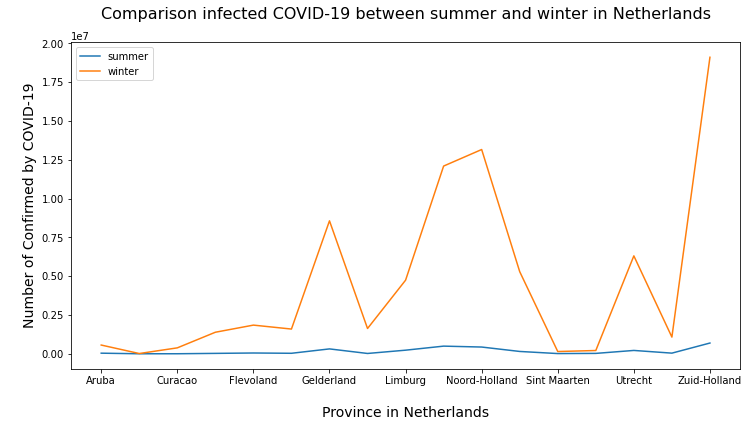

In [125]:
data_combined.plot(kind='line', figsize=(12,6))
plt.title('Comparison infected COVID-19 between summer and winter in Netherlands\n', size=16)
plt.ylabel('\nNumber of Confirmed by COVID-19', size=14)
plt.xlabel('\nProvince in Netherlands', size=14)
plt.show()

### Creating Bar Plot to see by a simple comparison between average of death percentage that caused by COVID-29 in each provinces in Netherlands

<AxesSubplot:xlabel='province'>

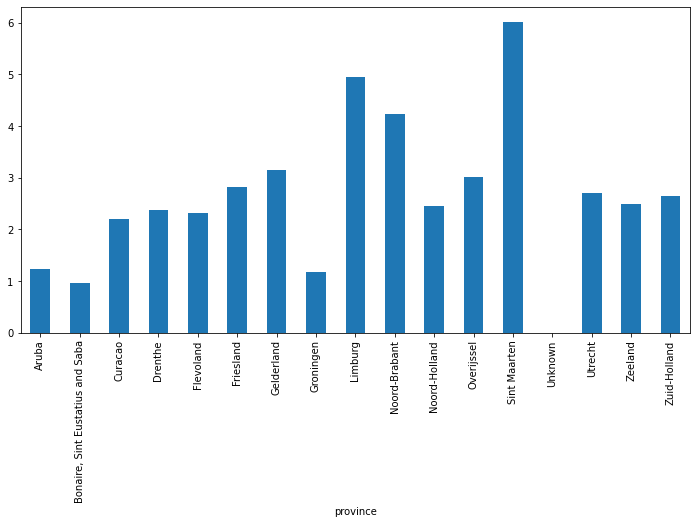

In [126]:
Netherlands.groupby('province')['deaths_percentage'].mean().plot(kind='bar', figsize=(12,6))

### Creating Pie Plot to see by simple visualitation of average between 5 provinces with the highest number from population that confirmed by COVID-19 virus in Netherlands

<AxesSubplot:title={'center':'3 provinces with the highest number that confirmed by COVID-19 in Netherlands'}, ylabel='confirmed'>

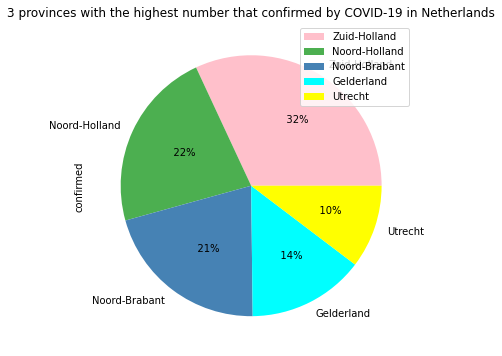

In [127]:
top_five.plot(kind='pie', y='confirmed', autopct='%5.0f%%', figsize=(10, 6), colors = ['pink', '#4CAF50', 
'steelblue', 'cyan', 'yellow'], title='3 provinces with the highest number that confirmed by COVID-19 in Netherlands')

### Creating Subplot from COVID-19 data in 2020 to 2022 in Netherlands to see by simple visualitation of average between population that confirmed by COVID-19, The death number that caused by COVID-19, and recovered by COVID-19 in each Provinces in Netherlands

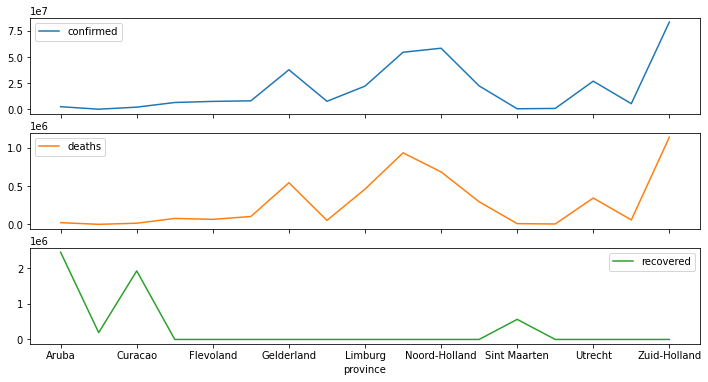

In [128]:
Netherlands.groupby('province')['confirmed', 'deaths', 'recovered'].sum().plot(subplots=True, figsize=(12, 6));

## Conclusions
### From the data exploration that has been done, we can conclude:

```text
1) population that confirmed by Covid-19 in Netherlands showed the differences between summer and winter. In winter there's increasing infected population than in summer, so we can conclude  if Covid Delta has a potention to spreads faster in winter than in summer

2) Based on the data analyst, there's the percentage average highest death number in Netherlands is in Sint Maarten Province with the percentage about 6% death_percentage than the other Province with the percentage about 2,4%

3) From data covid-19 listed in Netherlands in 2020 to 2022 clasified in 5 provinces that have highest confirmed infected by covid-19 virus population sequentially, which are: Zuid-Holland, Noord Holland, Noord-Brabant, Gelderland, and Utrecht
```